<Figure size 1600x600 with 0 Axes>

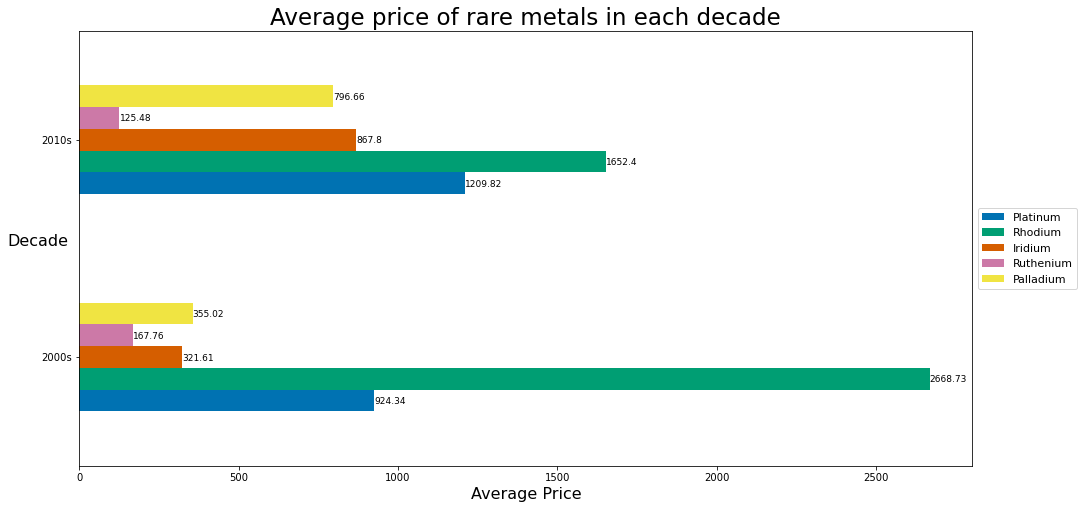

In [1]:
import quandl
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

#API Key authentication
quandl.ApiConfig.api_key = 'ENTER API KEY HERE' #subscribe to Quandl.com and add user-specific API key here

#Get data from API
platinum_data1 = quandl.get('JOHNMATT/PLAT', start_date='2000-01-01', end_date='2009-12-31', paginate = True)
rhodium_data1 = quandl.get('JOHNMATT/RHOD', start_date='2000-01-01', end_date='2009-12-31', paginate = True)
iridium_data1 = quandl.get('JOHNMATT/IRID', start_date='2000-01-01', end_date='2009-12-31', paginate = True)
ruthenium_data1 = quandl.get('JOHNMATT/RUTH', start_date='2000-01-01', end_date='2009-12-31', paginate = True)
palladium_data1 = quandl.get('JOHNMATT/PALL', start_date='2000-01-01', end_date='2009-12-31', paginate = True)

platinum_data2 = quandl.get('JOHNMATT/PLAT', start_date='2010-01-01', end_date='2019-12-31', paginate = True)
rhodium_data2 = quandl.get('JOHNMATT/RHOD', start_date='2010-01-01', end_date='2019-12-31', paginate = True)
iridium_data2 = quandl.get('JOHNMATT/IRID', start_date='2010-01-01', end_date='2019-12-31', paginate = True)
ruthenium_data2 = quandl.get('JOHNMATT/RUTH', start_date='2010-01-01', end_date='2019-12-31', paginate = True)
palladium_data2 = quandl.get('JOHNMATT/PALL', start_date='2010-01-01', end_date='2019-12-31', paginate = True)

#Data wrangling
pt_d1 = (platinum_data1['London 09:00'].sum(skipna = True))/(len(platinum_data1))
rh_d1 = (rhodium_data1['London 09:00'].sum(skipna = True))/(len(rhodium_data1))
ir_d1 = (iridium_data1['London 09:00'].sum(skipna = True))/(len(iridium_data1))
ru_d1 = (ruthenium_data1['London 09:00'].sum(skipna = True))/(len(ruthenium_data1))
pd_d1 = (palladium_data1['London 09:00'].sum(skipna = True))/(len(palladium_data1))

pt_d2 = (platinum_data2['London 09:00'].sum(skipna = True))/(len(platinum_data2))
rh_d2 = (rhodium_data2['London 09:00'].sum(skipna = True))/(len(rhodium_data2))
ir_d2 = (iridium_data2['London 09:00'].sum(skipna = True))/(len(iridium_data2))
ru_d2 = (ruthenium_data2['London 09:00'].sum(skipna = True))/(len(ruthenium_data2))
pd_d2 = (palladium_data2['London 09:00'].sum(skipna = True))/(len(palladium_data2))

#Add data to dataframe
# d1 = {'Platinum' : [pt_d1], 'Rhodium' : [rh_d1], 'Iridium' : [ir_d1], 'Ruthenium' : [ru_d1], 'Palladium' : [pd_d1]}
# d2 = {'Platinum' : [pt_d2], 'Rhodium' : [rh_d2], 'Iridium' : [ir_d2], 'Ruthenium' : [ru_d2], 'Palladium' : [pd_d2]}

d1 = {'Platinum' : [pt_d1, pt_d2], 'Rhodium' : [rh_d1, rh_d2], 'Iridium' : [ir_d1, ir_d2], 'Ruthenium' : [ru_d1, ru_d2], 'Palladium' : [pd_d1, pd_d2]}

Data = pd.DataFrame(data = d1, index = ['2000s' , '2010s'])
# Data = Data.append(d2, ignore_index = True)
Data.columns = ['Platinum' , 'Rhodium','Iridium','Ruthenium','Palladium']

#Setting graoh environment
%matplotlib inline
plt.style.use("seaborn-colorblind")

#set size
fig = plt.figure(figsize = (16,6), dpi= 100, facecolor='w', edgecolor='k')

#plot multi-bar graph
# bars = Data.plot.barh()
ax = Data.plot.barh()

# ax.axes.get_xaxis().set_visible(False)

#fine tuning graph
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.title("Average price of rare metals in each decade", fontsize = 23)
plt.ylabel("Decade", fontsize = 16, rotation = 0)
plt.xlabel("Average Price", fontsize = 16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 11})

for p in ax.patches:
    ax.text(p.get_width()+.35, p.get_y()+.035, str(round((p.get_width()), 2)), fontsize=9)

plt.gcf().set_size_inches(16, 8)

#save output to output directory
plt.savefig('Average Price difference in each decade.png')

#display graph
plt.show()

# print(Data)